# Guía 5 - Transformada Z

## Ejercicio 4

Considere el sistema continuo
$$
H(s) = \frac{12500s}{44s^2 + 60625s + 625 \cdot 10^4}
$$

y obtenga la función de transferencia $H(z)$ del sistema discreto correspondiente, mediante la utilización de las transformaciones conformes de Euler y Bilineal. Para ello:
1. Determine la frecuencia de corte del sistema continuo (frecuencia donde la respuesta cae 3dB respecto al valor máximo) y utilice, para aplicar las transformaciones conformes, una frecuencia de meustreo cuatro veces superior a ésta.
2. Analice la respuesta en frecuencaia de los dos sistemas discretos obtenidos y compárelas con la del sistema continuo. Determine si la frecuencia de muestreo empleada permite obtener la respuesta esperada mediante ambas transformaciones conformes.

### Solución

Utilizando transformaciones conformes de Euler y Bilineal obtenemos las expresiones de las funciones de transferencia $H(z)$
- Euler:
$$
H\left( \frac{1-z^{-1}}{T} \right) = \frac{12500\left( \frac{1-z^{-1}}{T} \right)}{44\left( \frac{1-z^{-1}}{T} \right)^2 + 60625\left( \frac{1-z^{-1}}{T} \right) + 625 \cdot 10^4}
$$
- Bilineal
$$
H\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right) = \frac{12500\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right)}{44\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right)^2 + 60625\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right) + 625 \cdot 10^4}
$$

1. Para determinar la frecuencia de corte obtenemos la respuesta en frecuencia del sistema continuo ($H(s)$ para $s=j\omega$), obtenemos el maximo y luego la frecuencia con respuesta 3dB menor al maximo.

377
2438


/tmp/ipykernel_23914/1821699595.py:19: RuntimeWarning: divide by zero encountered in log10
  CFT = 10*np.log10(np.abs(HCont(s))) # convertir a decibeles


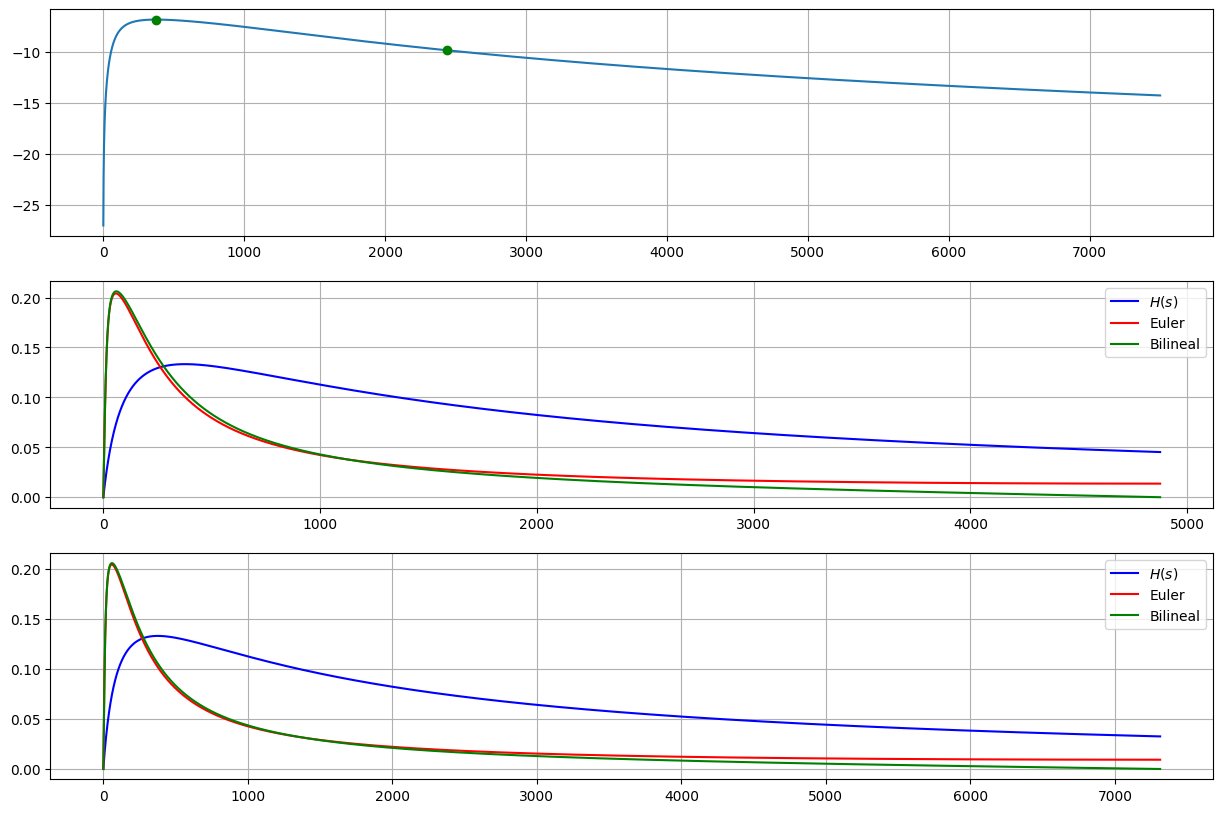

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sEuler(T,z):
    return (np.ones(len(z)) - np.power(z,-1))/T

def sBilineal(T,z):
    return (2/T)*np.divide(np.ones(len(z)) - np.power(z,-1),np.ones(len(z)) + np.power(z,-1))

def HCont(w):
    '''evaluamos la respuesta en frecuencias del sistema continuo'''
    return np.divide(12500*w, 44*np.power(w,2) + 60625*w + 6250000*np.ones(len(w)))

# Parametros
fmtest = 15000
s = 1j*np.arange(fmtest//2)

# Respuesta en frecuencia del sistema continuo
CFT = 10*np.log10(np.abs(HCont(s))) # convertir a decibeles
fMax = np.argmax(CFT)
dbMax = CFT[fMax]

# Encontrar frecuencia de corte
fCorte = fMax+1
while CFT[fCorte] > dbMax-3:
    fCorte += 1
print(fMax)
print(fCorte)

# Obtener funciones de transferencia H(z)
fm = 4*fCorte
f = np.arange(fm//2)
T =  1/(fm)
omega = np.linspace(0,np.pi,len(f),endpoint=False)
z = [np.exp(1j*om) for om in omega]
HEuler = HCont(sEuler(T,z))
HBilineal = HCont(sBilineal(T,z))

# Obtener funciones de transferencia con mayor frecuencia de muestreo
fm2 = 6*fCorte
f2 = np.arange(fm2//2)
T2 =  1/(fm2)
omega2 = np.linspace(0,np.pi,len(f2),endpoint=False)
z2 = [np.exp(1j*om) for om in omega2]
HEuler2 = HCont(sEuler(T2,z2))
HBilineal2 = HCont(sBilineal(T2,z2))

fig, ax = plt.subplots(3)
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    axi.grid()

ax[0].plot(np.abs(s),CFT)
ax[0].plot(fMax,CFT[fMax], 'go')
ax[0].plot(fCorte,CFT[fCorte], 'go')

ax[1].plot(f,np.abs(HCont(f)),color='b',label='$H(s)$')
ax[1].plot(f,np.abs(HEuler),color='r',label='Euler')
ax[1].plot(f,np.abs(HBilineal),color='g',label='Bilineal')
ax[1].legend()

ax[2].plot(f2,np.abs(HCont(f2)),color='b',label='$H(s)$')
ax[2].plot(f2,np.abs(HEuler2),color='r',label='Euler')
ax[2].plot(f2,np.abs(HBilineal2),color='g',label='Bilineal')
ax[2].legend()